# Ignoring warnings using warning module

In [1]:
import warnings as warn
warn.filterwarnings('ignore')

# Installing Ultralytics library 

In [3]:
!pip install ultralytics

# Installing YoloV8

In [4]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


# Downloading dataset using Roboflow

In [5]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="nfBDjbhZIESZICEXpniP")
project = rf.workspace("vallabha-group-of-companies").project("pedestrian-dataset-tqruw")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12


Extracting Dataset Version Zip to PEDESTRIAN-DATASET-1 in yolov8:: 100%|██████████| 2666/2666 [00:00<00:00, 6878.62it/s]


# Editing the yaml to avoid filenotfound errors

In [6]:
import ruamel.yaml
def edit_yaml_file(file_path):
    with open(file_path, 'r') as file:
        yaml_data = ruamel.yaml.safe_load(file)
    yaml_data['train'] = '/kaggle/working/PEDESTRIAN-DATASET-1/train'
    yaml_data['test'] = '/kaggle/working/PEDESTRIAN-DATASET-1/test'
    yaml_data['val'] = '/kaggle/working/PEDESTRIAN-DATASET-1/valid'
    with open(file_path, 'w') as file:
        ruamel.yaml.dump(yaml_data, file)
file_path = '/kaggle/working/PEDESTRIAN-DATASET-1/data.yaml'
edit_yaml_file(file_path)

# Getting started with model training

In [7]:
!yolo task=detect mode=train model=yolov8n.pt data='/kaggle/working/PEDESTRIAN-DATASET-1/data.yaml' epochs=100 imgsz=640

100%|███████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 103MB/s]
Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/PEDESTRIAN-DATASET-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

# Visualizing the confusion matrix to check model performance

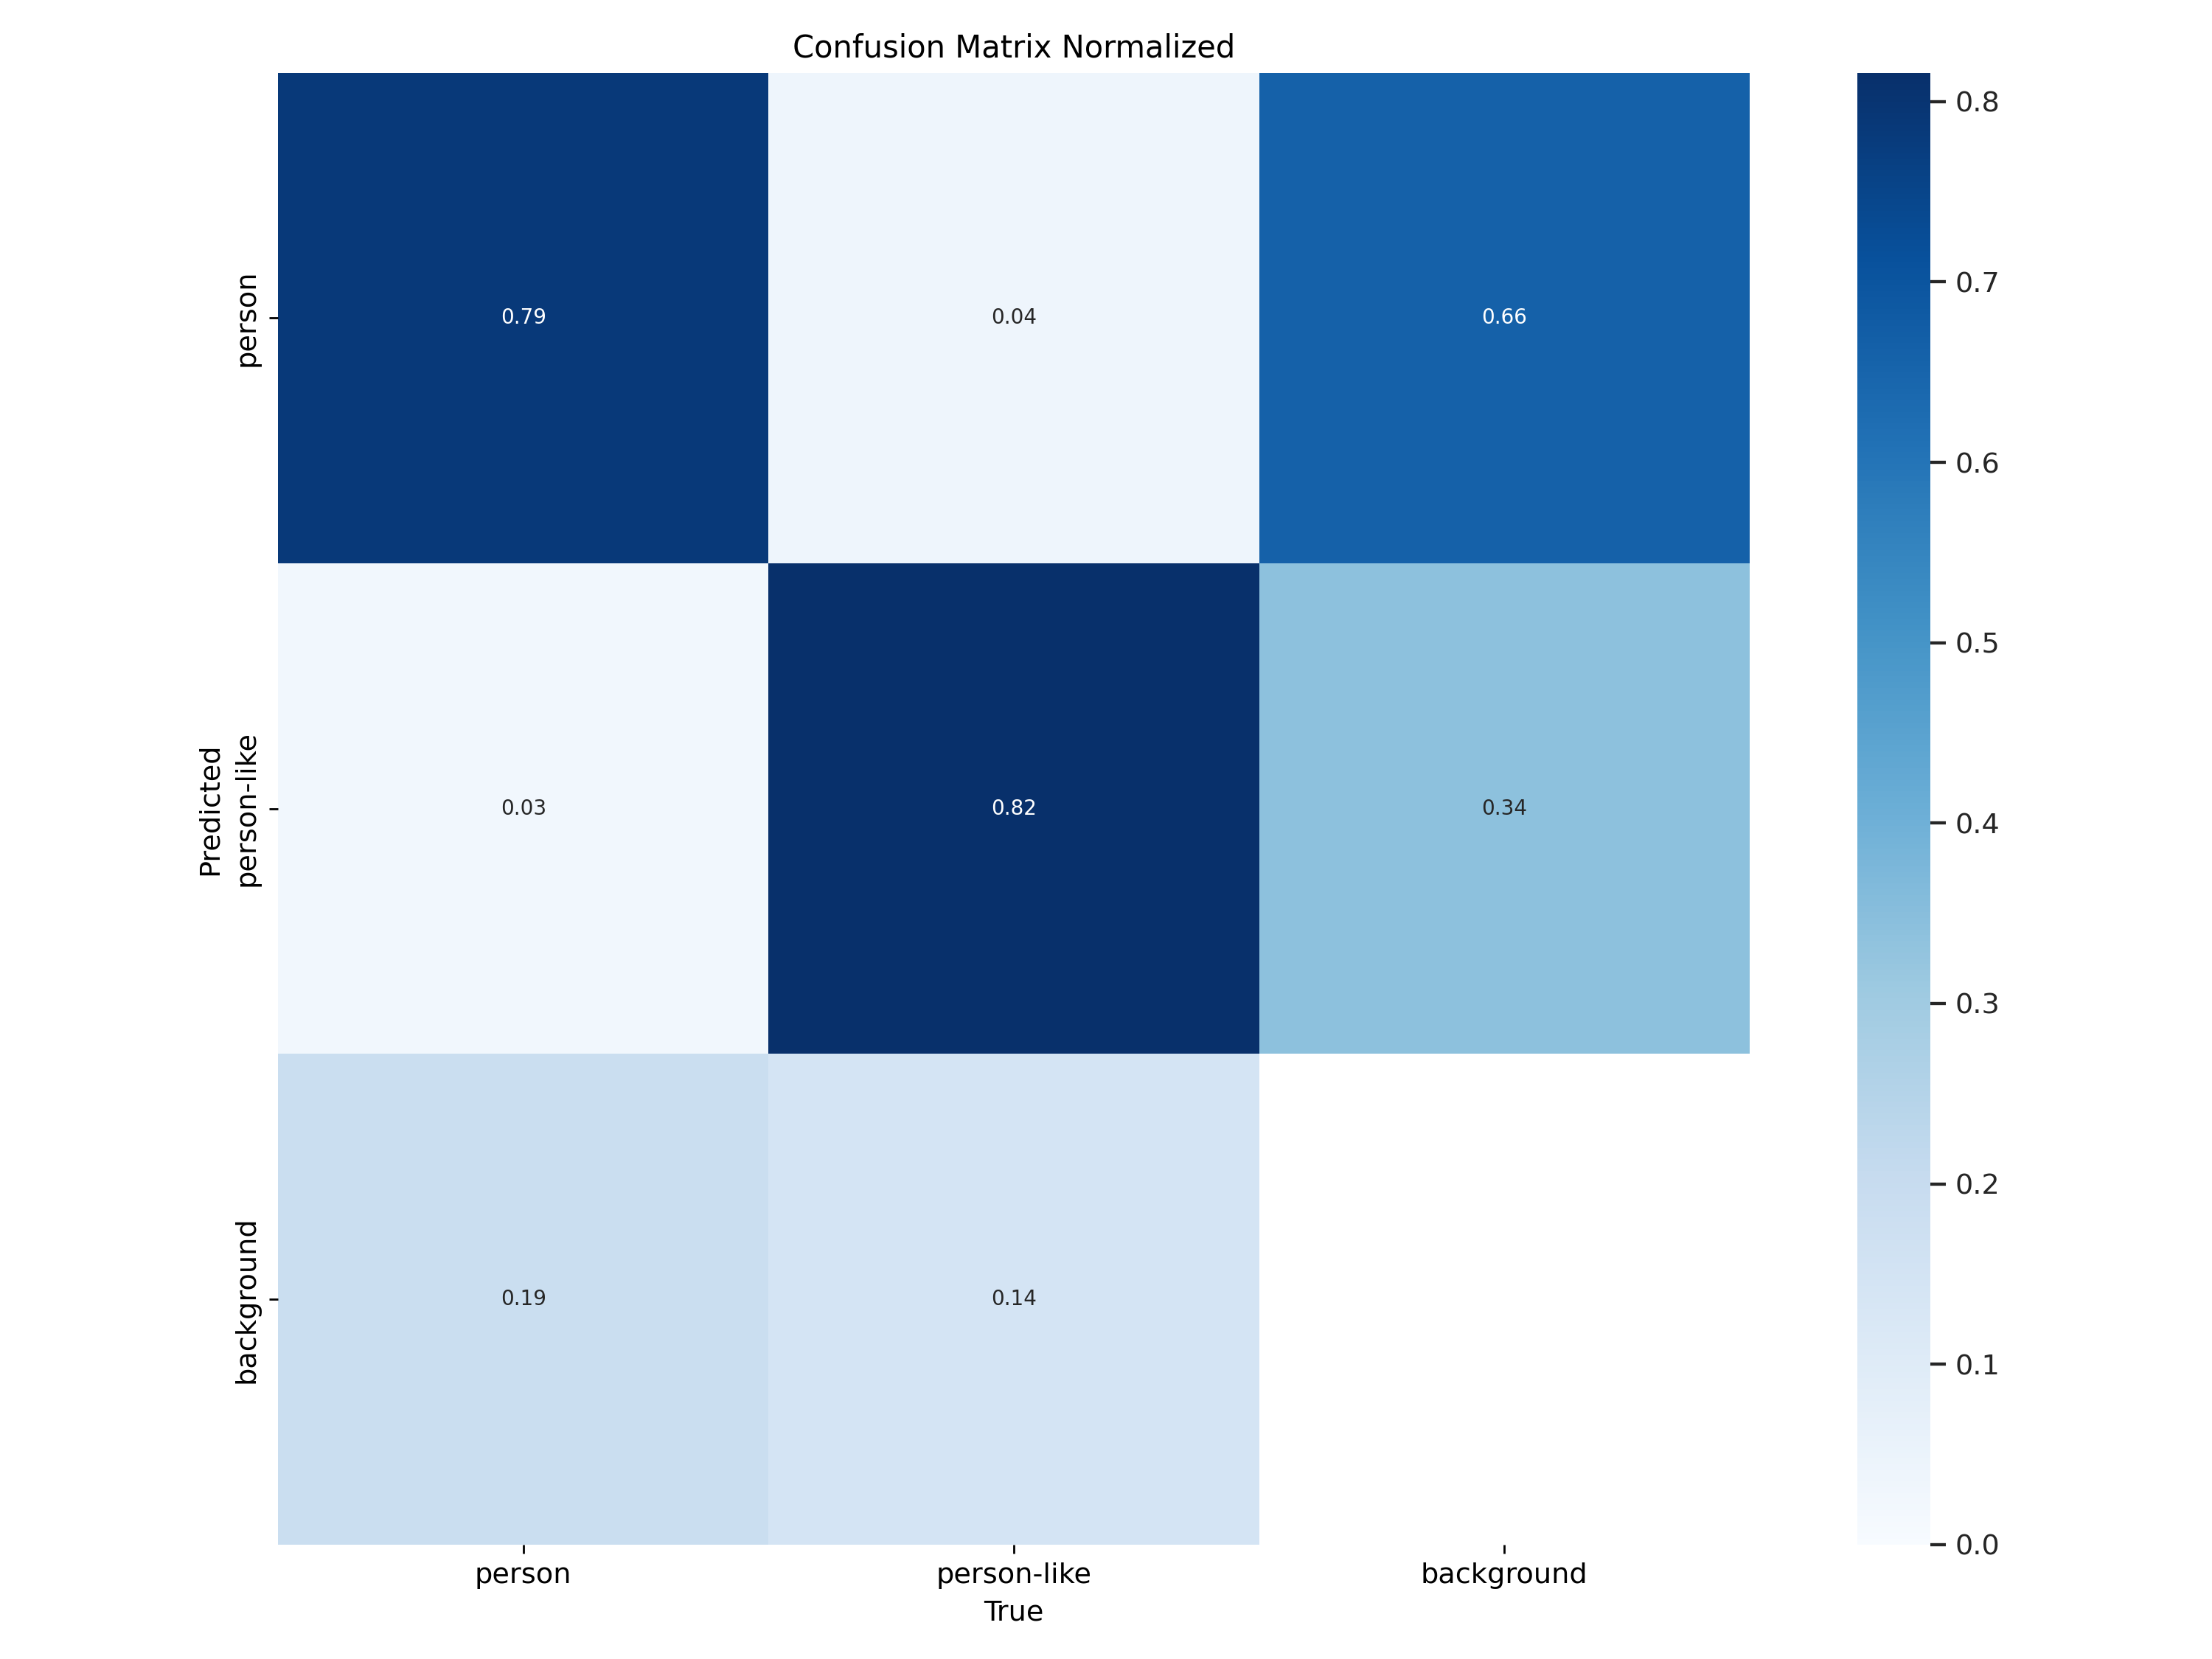

In [8]:
Image(filename=f'/kaggle/working/runs/detect/train/confusion_matrix_normalized.png', width=600)

# Visualizing the results of model training

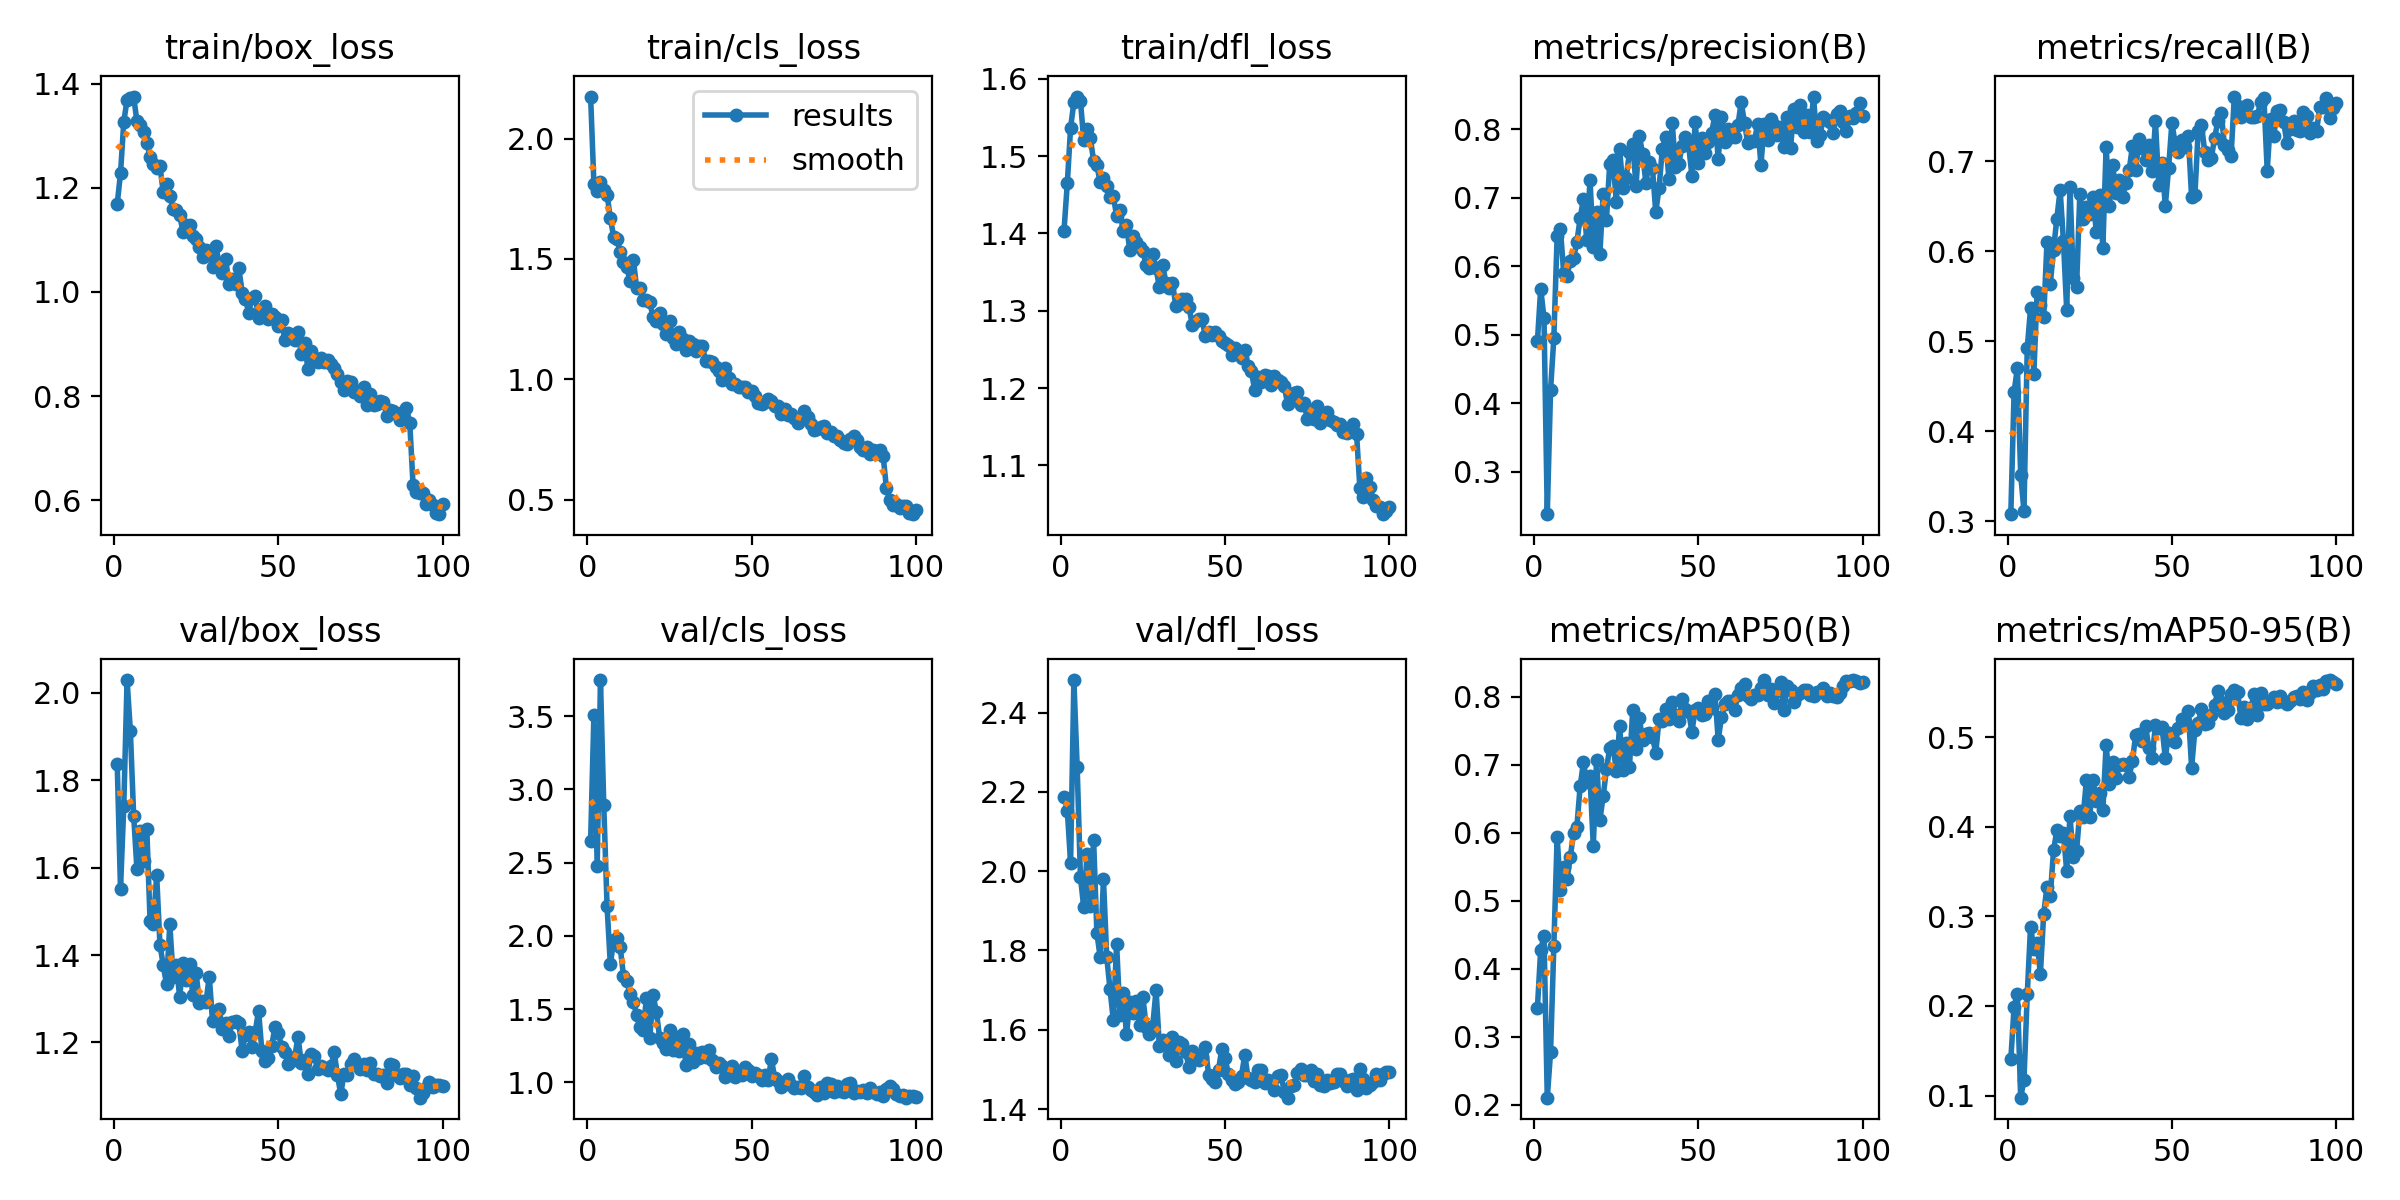

In [9]:
Image(filename=f'/kaggle/working/runs/detect/train/results.png', width=600)

# Getting started with model validation

In [10]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train/weights/best.pt' data='/kaggle/working/PEDESTRIAN-DATASET-1/data.yaml'

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/PEDESTRIAN-DATASET-1/valid/labels.cache... 266 ima
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        266        523      0.825      0.748      0.824      0.563
                person        266        322      0.805       0.72        0.8      0.507
           person-like        266        201      0.844      0.776      0.849       0.62
Speed: 1.1ms preprocess, 3.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# viewing validation results

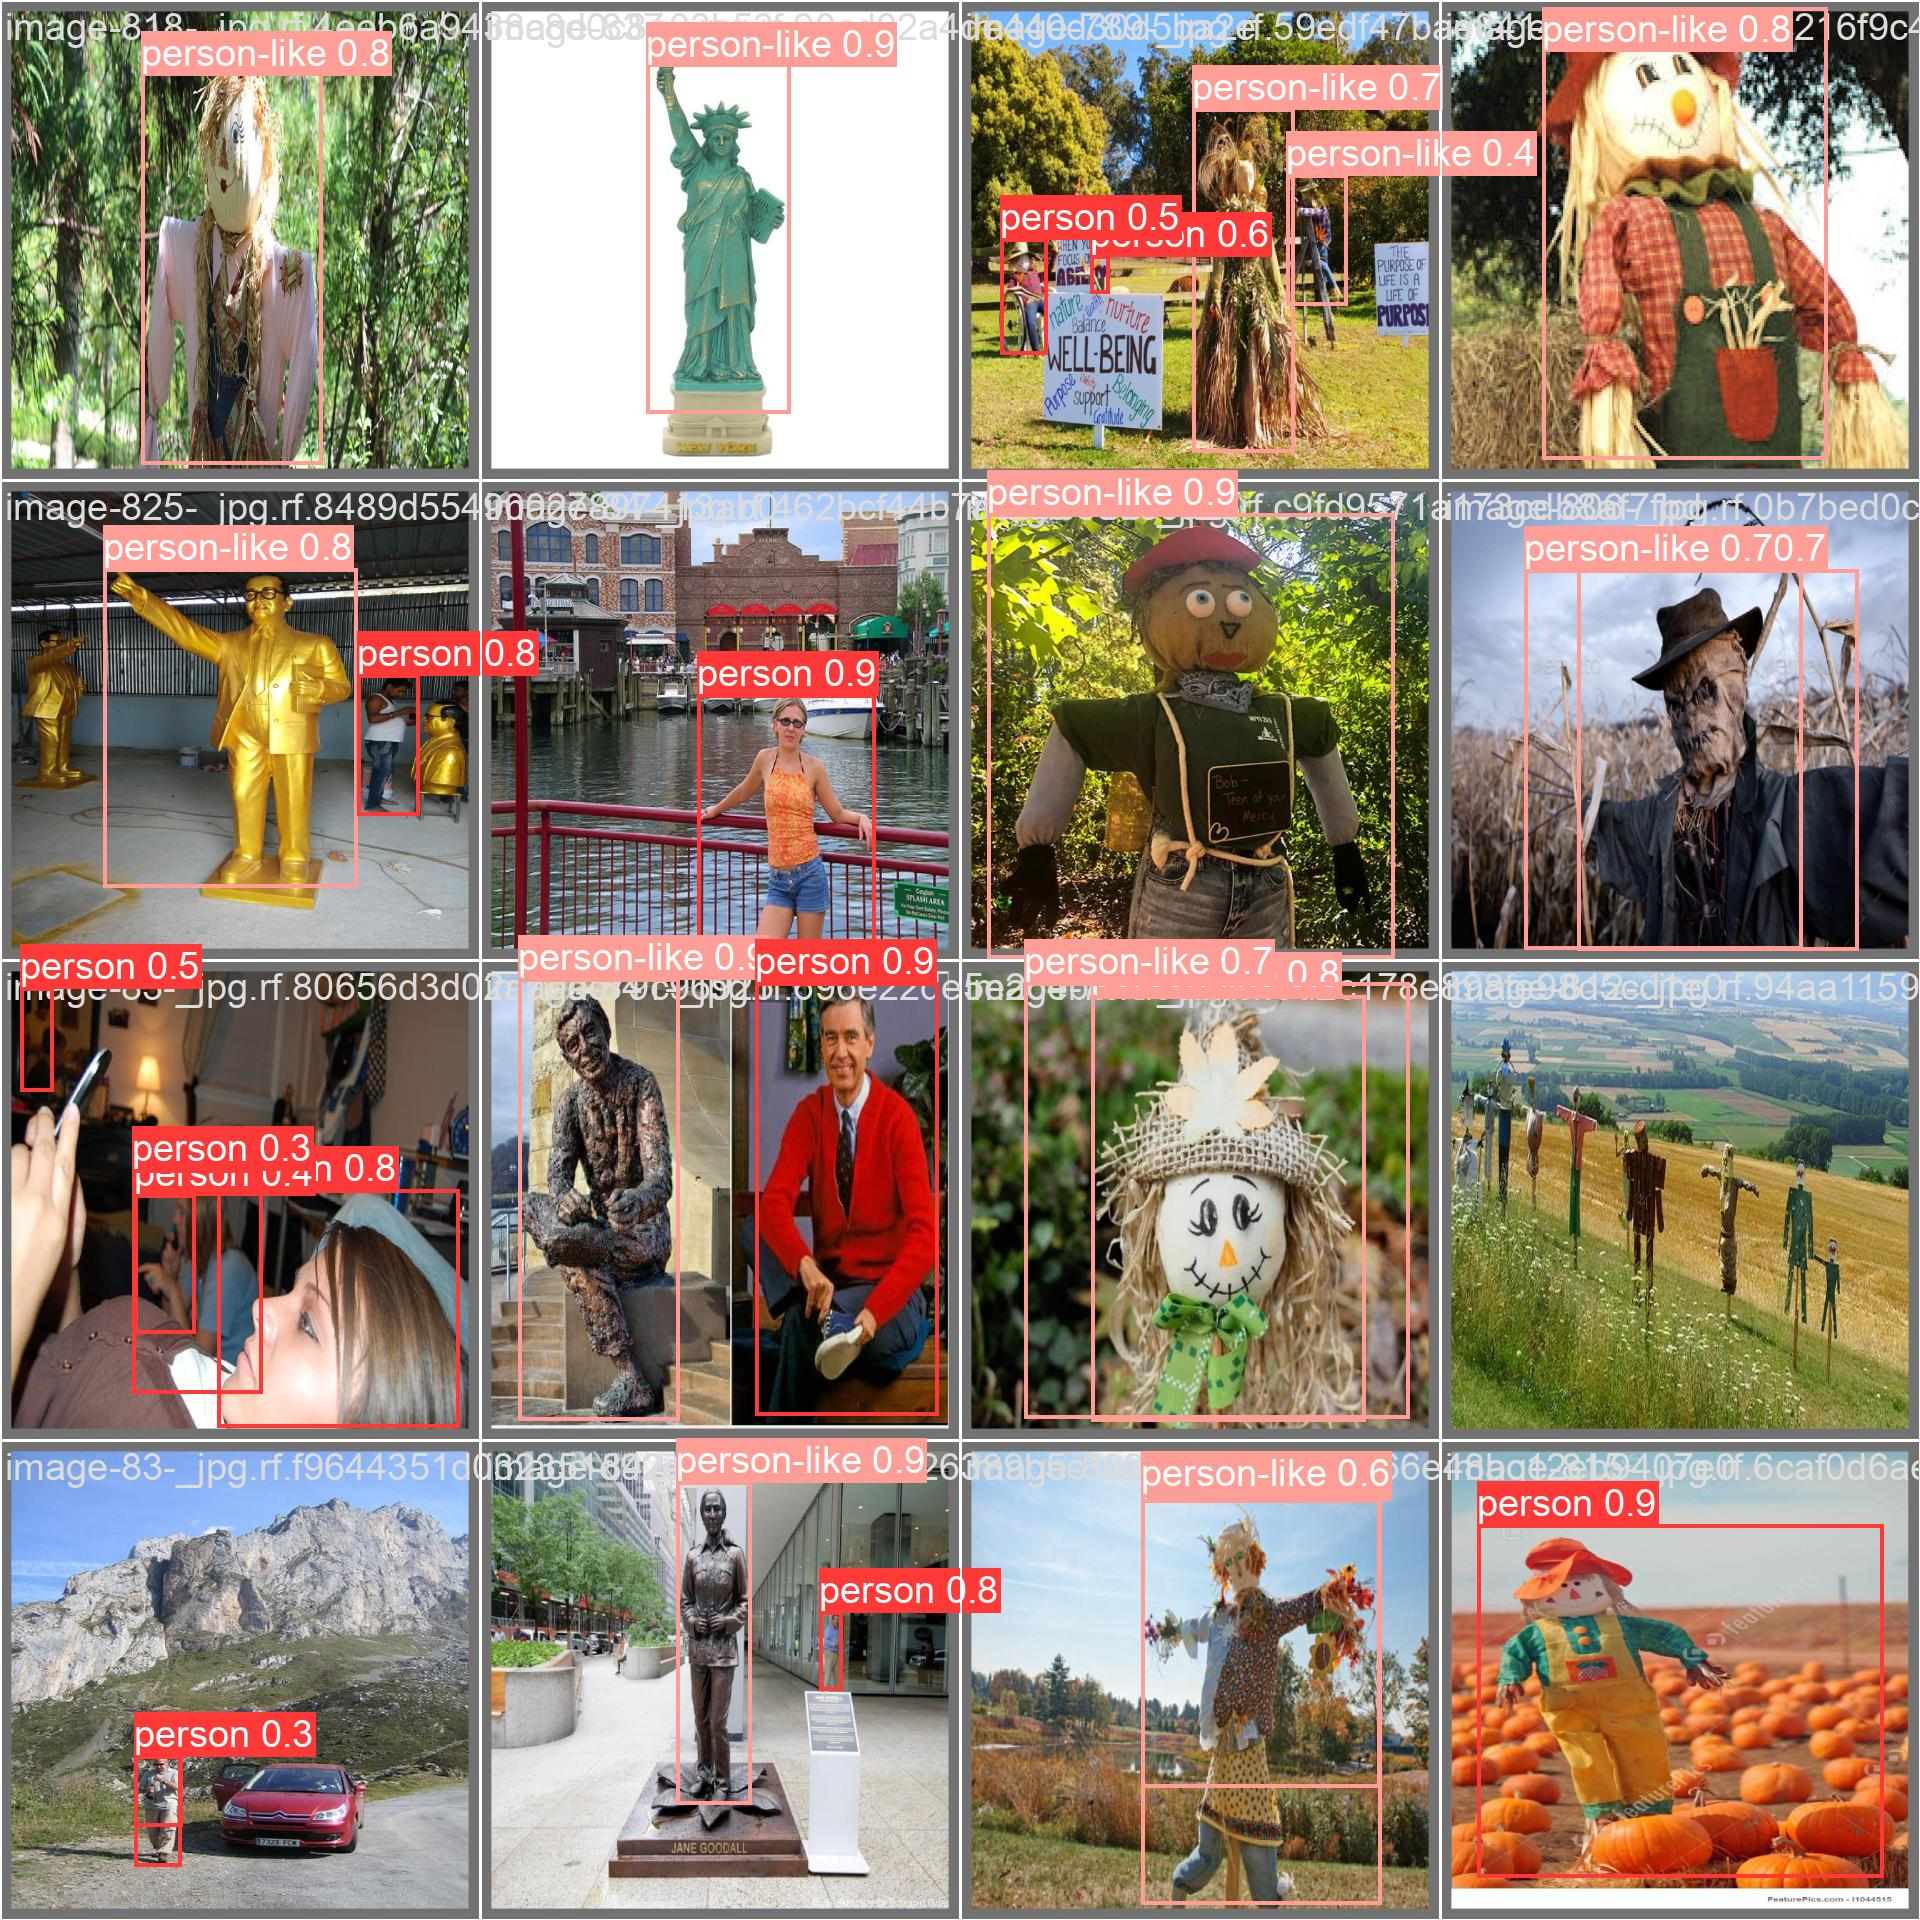

In [11]:
Image(filename=f'/kaggle/working/runs/detect/val/val_batch1_pred.jpg', width=600)

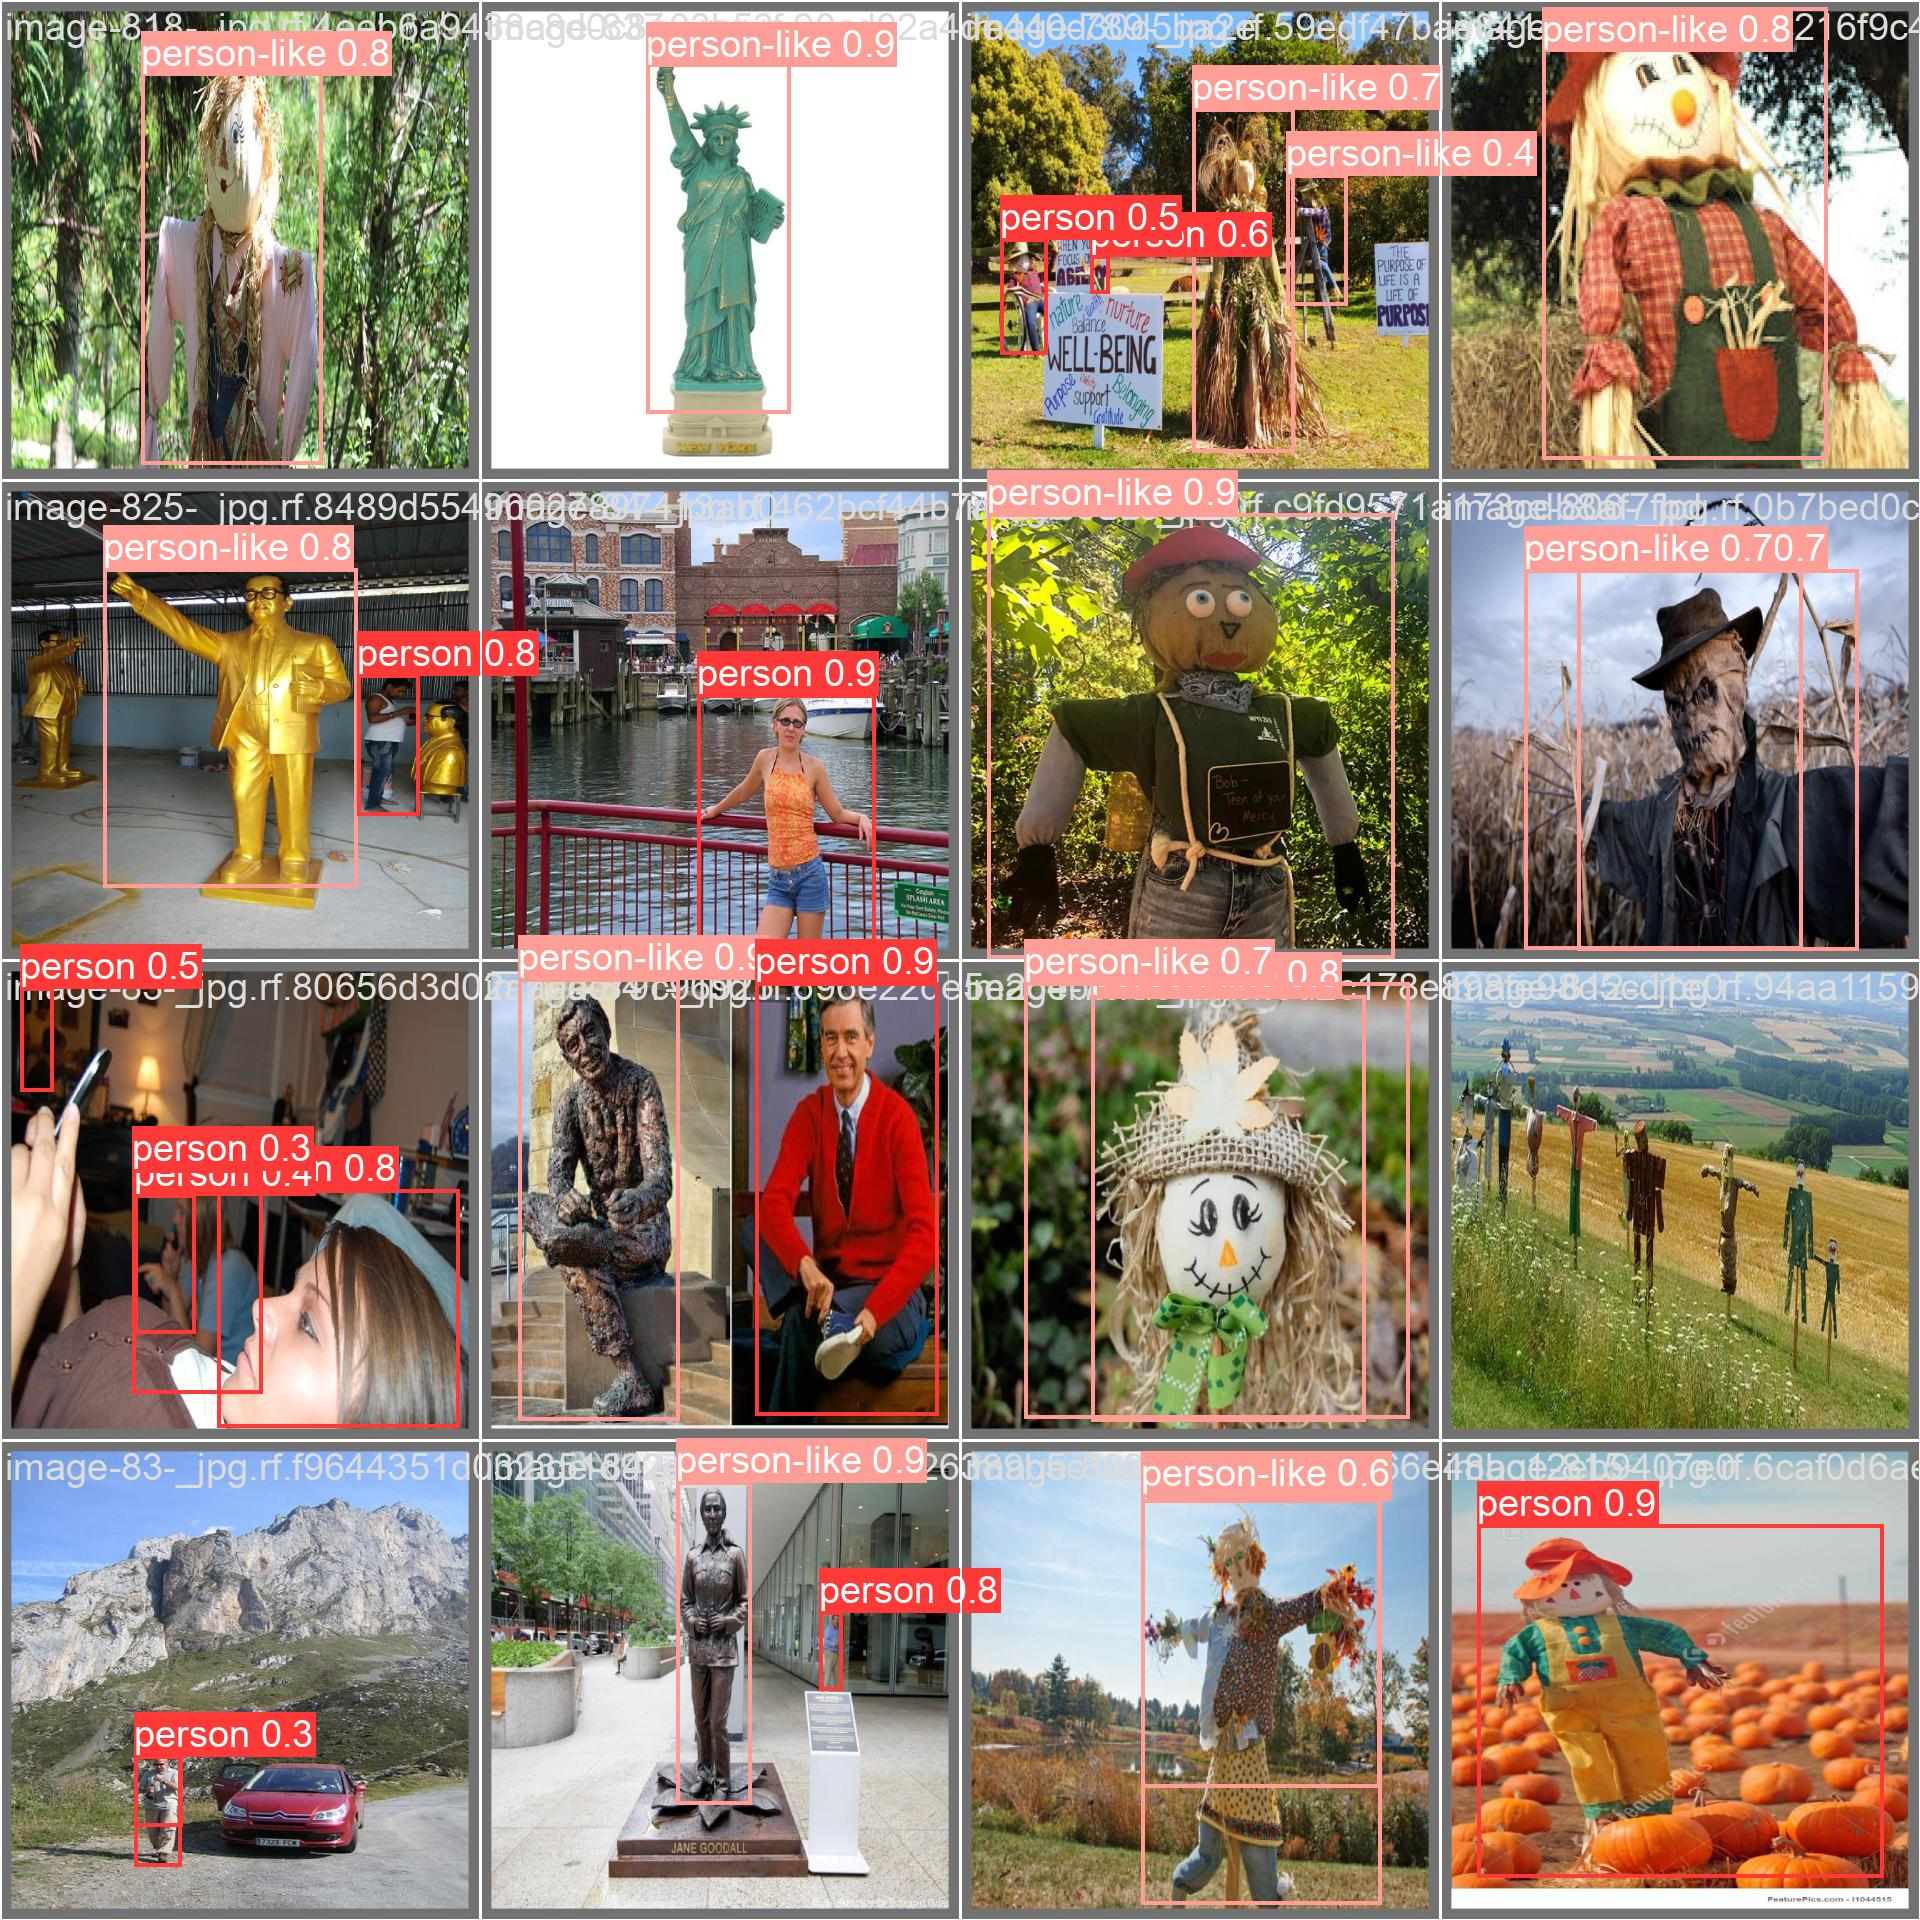

In [12]:
Image(filename=f'/kaggle/working/runs/detect/val/val_batch1_pred.jpg', width=600)

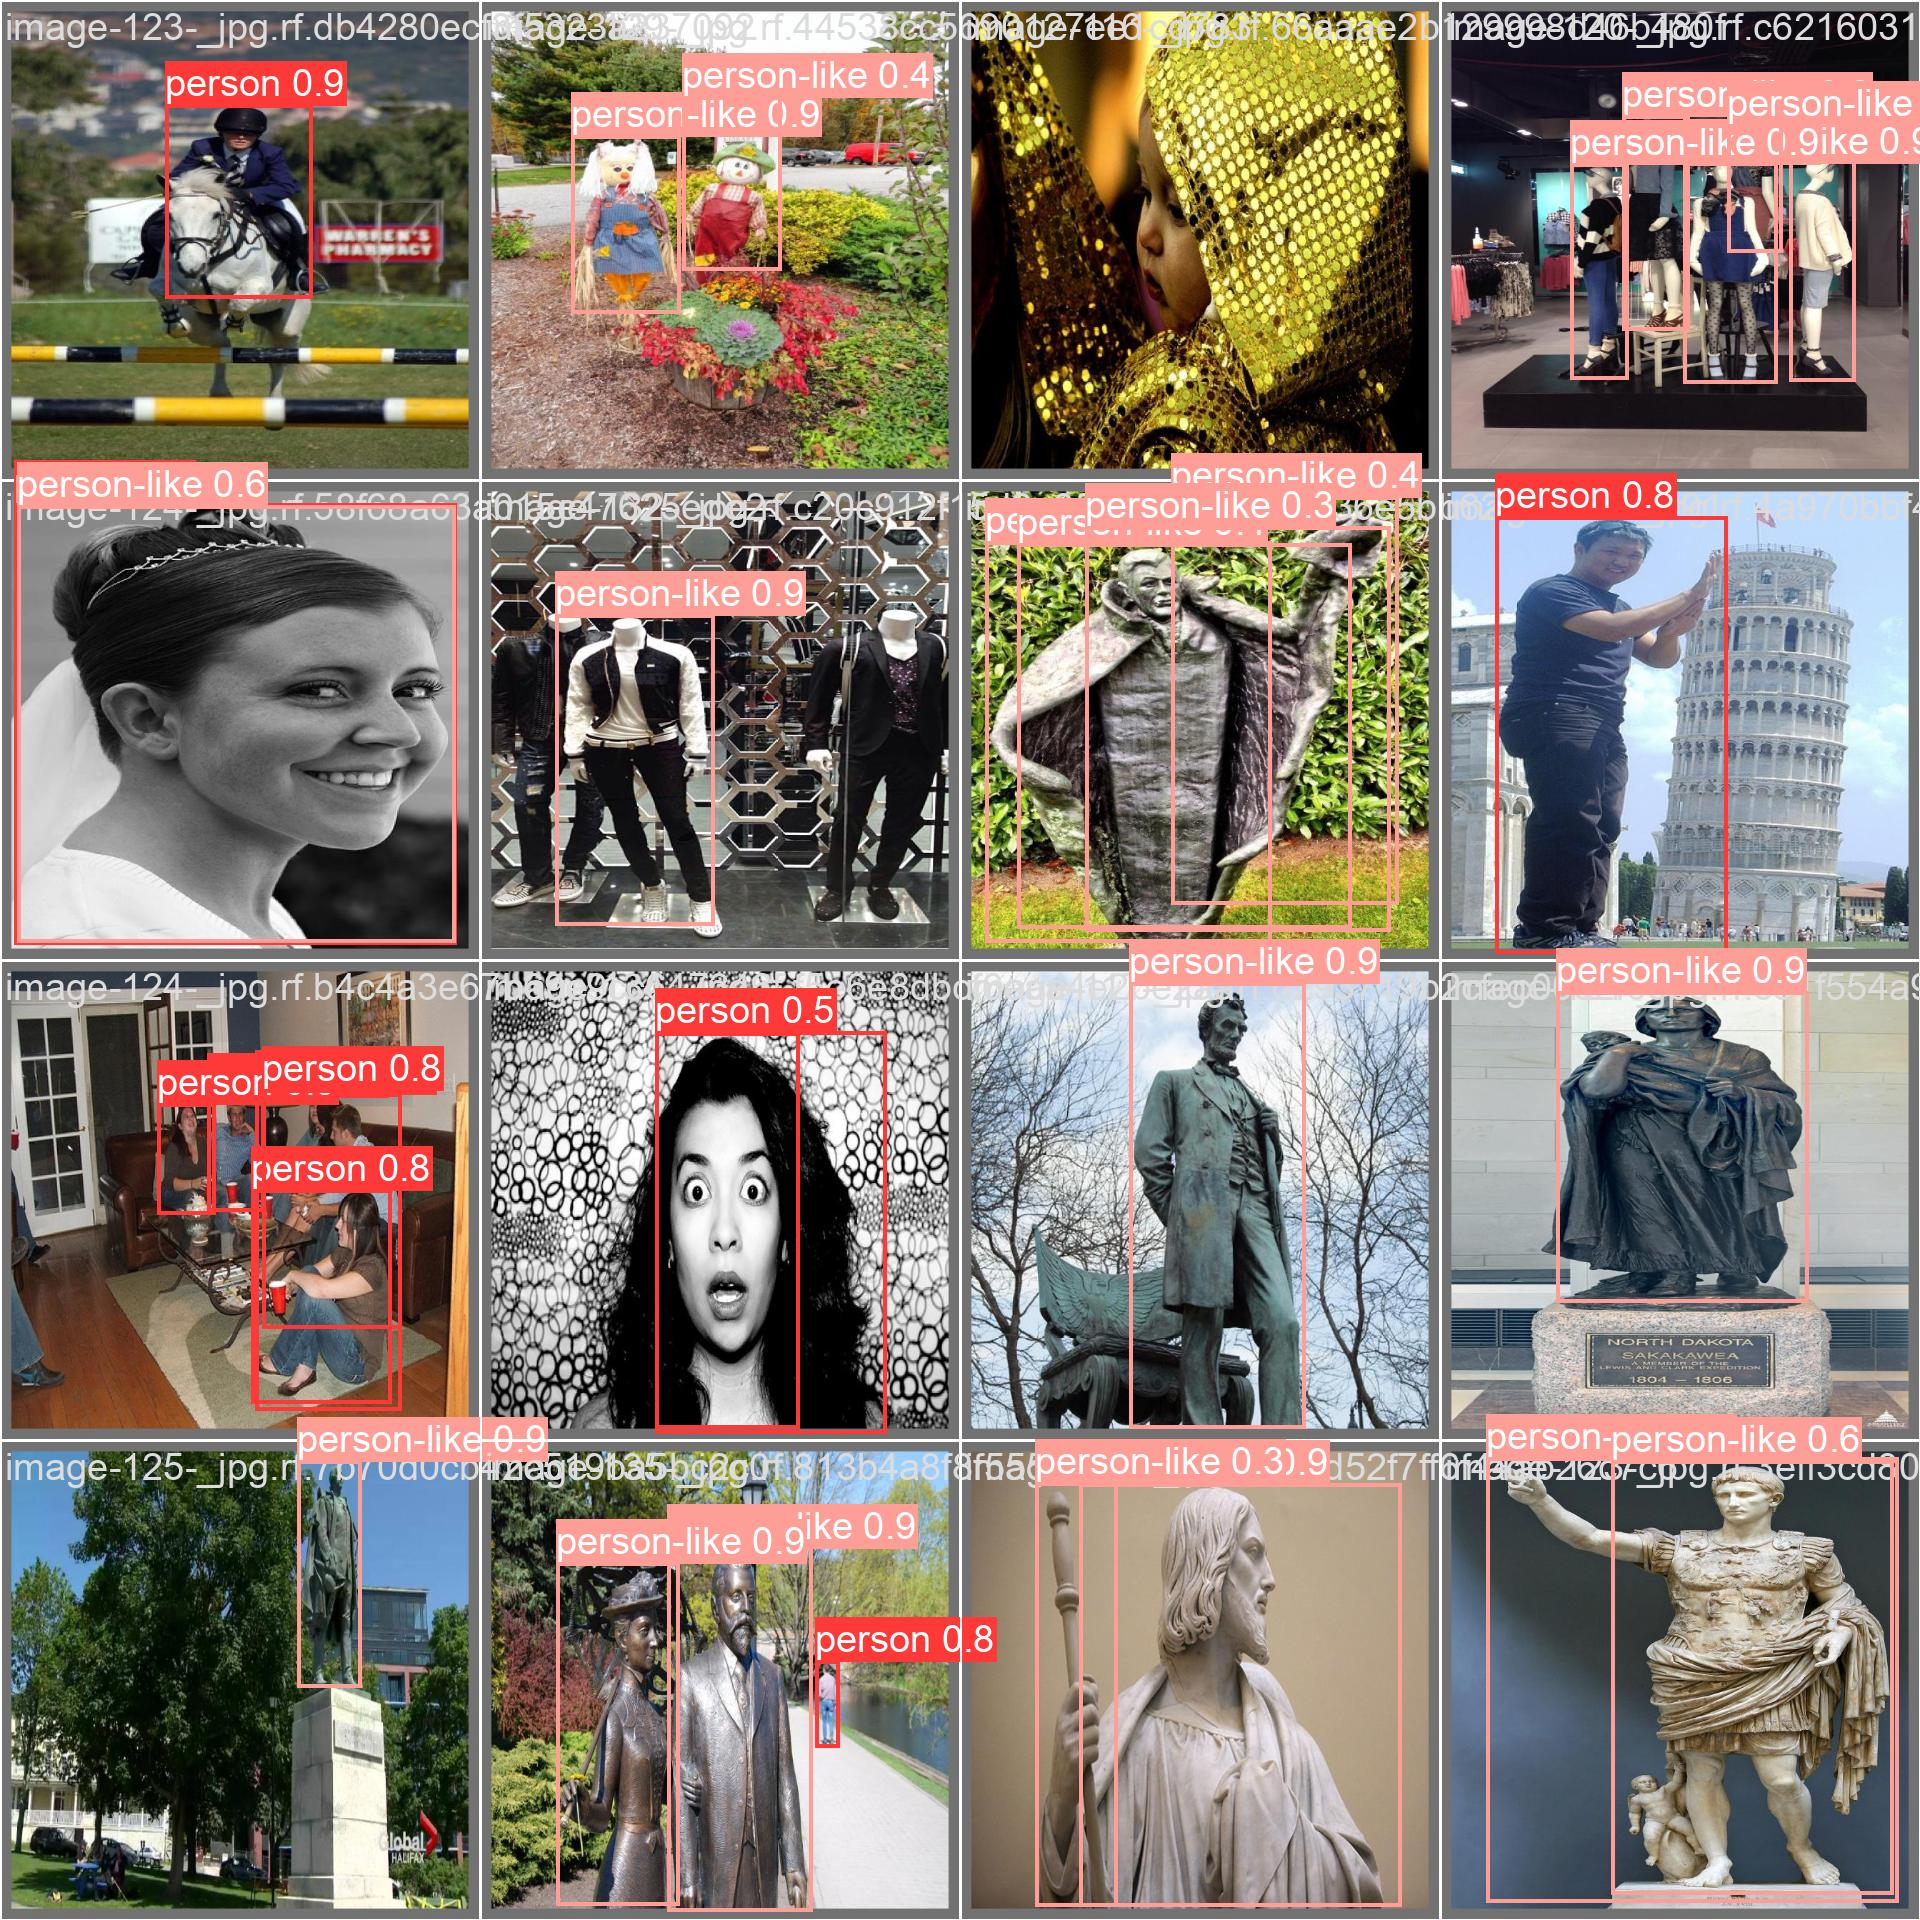

In [13]:
Image(filename=f'/kaggle/working/runs/detect/val/val_batch2_pred.jpg', width=600)

# Getting started with model prediction 

In [14]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/train/weights/best.pt' conf=0.5 source='/kaggle/working/PEDESTRIAN-DATASET-1/valid/images' save_txt=true save_conf=true

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/266 /kaggle/working/PEDESTRIAN-DATASET-1/valid/images/image-1-_jpg.rf.1239724721282c75a6ed2556eb8ad5f0.jpg: 640x640 1 person, 6.5ms
image 2/266 /kaggle/working/PEDESTRIAN-DATASET-1/valid/images/image-10-_jpg.rf.5d5f254be718458876054c7d5c94666b.jpg: 640x640 (no detections), 7.3ms
image 3/266 /kaggle/working/PEDESTRIAN-DATASET-1/valid/images/image-10-_jpg.rf.e83a2535e9a870b5236d2e2cb7524cd4.jpg: 640x640 1 person, 6.1ms
image 4/266 /kaggle/working/PEDESTRIAN-DATASET-1/valid/images/image-100-_jpg.rf.ae1ff16870eb8a2a99a7a2c23fdb6b4a.jpg: 640x640 1 person, 5.8ms
image 5/266 /kaggle/working/PEDESTRIAN-DATASET-1/valid/images/image-101-_jpg.rf.345aabd88c7ce0b2319f0db4c22d66d3.jpg: 640x640 1 person, 1 person-like, 6.3ms
image 6/266 /kaggle/working/PEDESTRIAN-DATASET-1/valid/images/image-101-_jpg.rf.56e3fffb88397cab7a5

# Viewing the test results

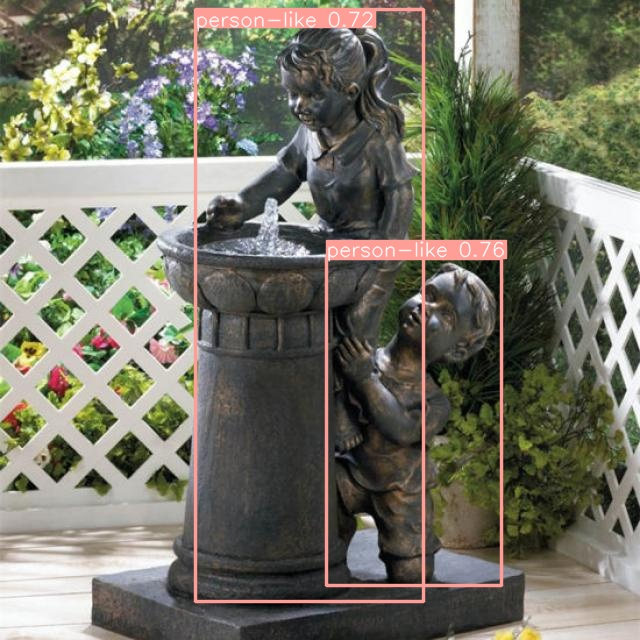

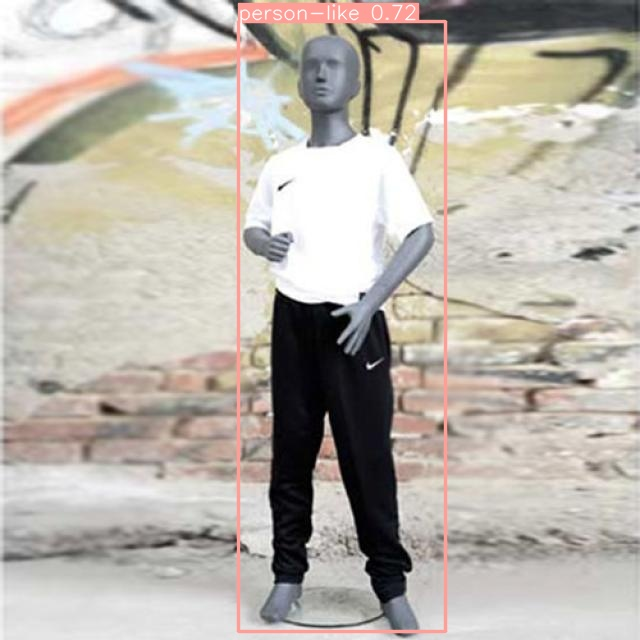

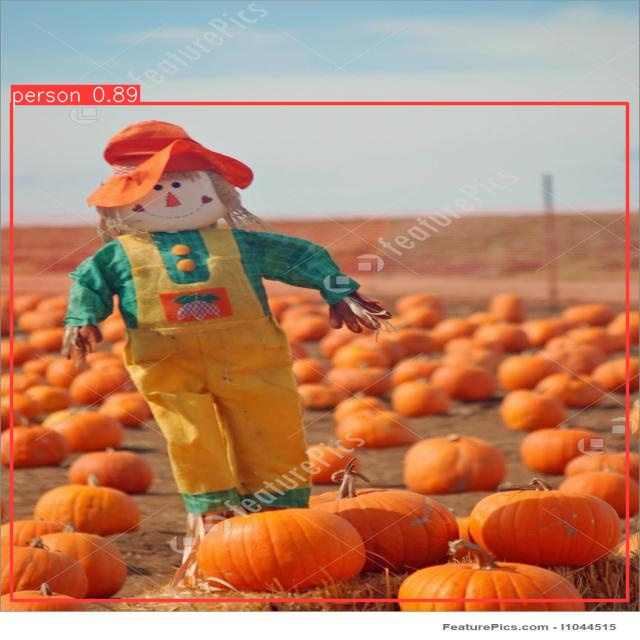

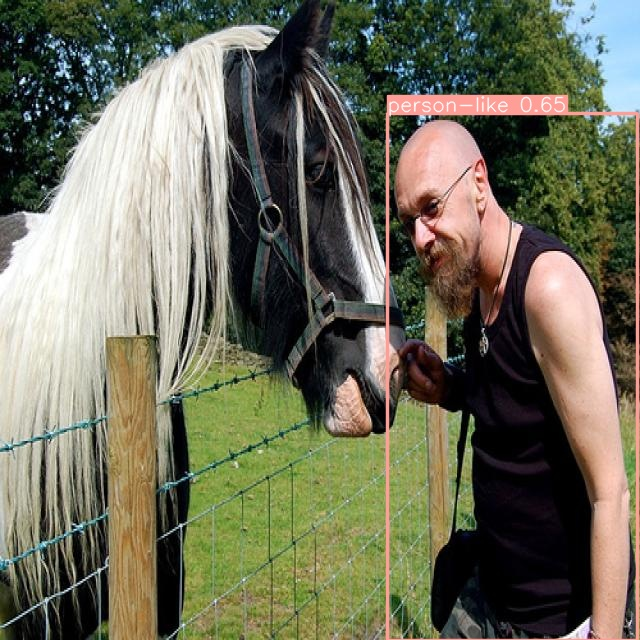

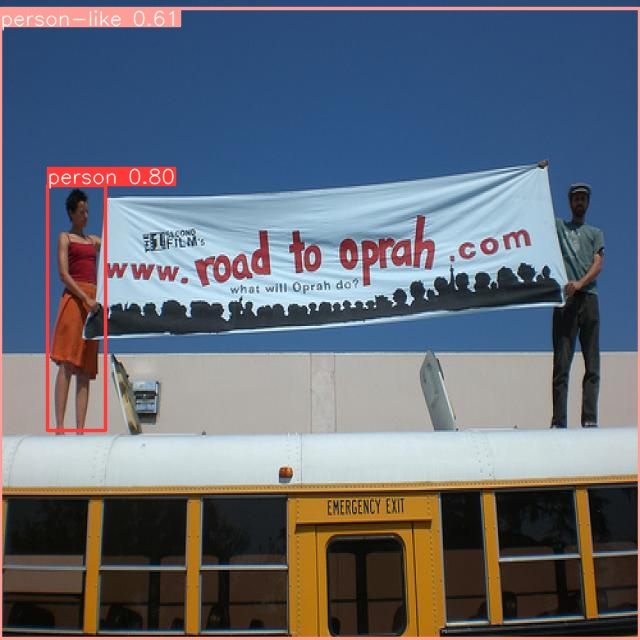

In [17]:
import glob
for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[:5]:
    display(Image(filename=image_path, height=600))
    print("\n")

In [1]:

from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.1.24 🚀 Python-3.11.8 torch-2.2.1+cu121 CPU (AMD Ryzen 3 3250U with Radeon Graphics)
Setup complete ✅ (4 CPUs, 7.4 GB RAM, 264.7/467.9 GB disk)


In [2]:
!yolo task=detect mode=predict model='/home/user/Documents/NULL_CLASS_INTERNSHIP/PedestrianDetectionProject-NullClassInternshipTask/best.pt' conf=0.5 source='/home/user/Documents/NULL_CLASS_INTERNSHIP/PedestrianDetectionProject-NullClassInternshipTask/trash/test_images/image3.jpg' save_txt=true save_conf=true

Ultralytics YOLOv8.1.24 🚀 Python-3.11.8 torch-2.2.1+cu121 CPU (AMD Ryzen 3 3250U with Radeon Graphics)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /home/user/Documents/NULL_CLASS_INTERNSHIP/PedestrianDetectionProject-NullClassInternshipTask/trash/test_images/image3.jpg: 448x640 5 persons, 342.0ms
Speed: 10.3ms preprocess, 342.0ms inference, 18.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict
